In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# We load the data
df = pd.read_csv("datasets/training_1.csv")
df2 = pd.read_csv("datasets/training_2.csv")
df.head()

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,06/01/14 00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
1,06/01/14 01,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2,06/01/14 02,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
3,06/01/14 03,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
4,06/01/14 04,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [3]:
# Let's drop the not interesting columns
df.drop(["DATETIME"],axis=1,inplace=True)
#for column in df:
#    if df[column].std() == 0:
#        df.drop([column],axis=1,inplace=True)
        
df2.drop(["DATETIME"],axis=1,inplace=True)
#for column in df2:
#    if df2[column].std() == 0:
#        df2.drop([column],axis=1,inplace=True)
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
1,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
3,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
4,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [4]:
# Normalization TODO normalize them together
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df.columns)

x = df2.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled, columns=df2.columns)
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,0.041663,0.326844,0.120893,0.294027,0.474946,0.728796,0.128789,0.362889,0.0,0.988791,...,0.754011,0.444055,0.575244,0.190652,0.769913,0.195089,0.346838,0.097967,0.478234,0.0
1,0.020317,0.319408,0.297909,0.308547,0.638842,0.992383,0.202221,0.365508,0.0,0.989764,...,0.815632,0.443421,0.608323,0.188221,0.775343,0.192696,0.348032,0.096095,0.475637,0.0
2,0.000000,0.315129,0.493043,0.466649,0.795042,1.000000,0.302105,0.347369,0.0,0.983022,...,0.869400,0.443424,0.621653,0.222958,0.835157,0.227449,0.465977,0.096111,0.475659,0.0
3,0.002805,0.319432,0.702160,0.648073,0.926695,1.000000,0.544778,0.324639,0.0,0.974574,...,0.920844,0.450190,0.649743,0.521689,0.206488,0.522436,0.552520,0.101490,0.483118,0.0
4,0.035899,0.334301,0.923501,0.895404,0.770673,1.000000,0.858088,0.318617,0.0,0.972335,...,0.983674,0.461483,0.696660,0.530118,0.208966,0.530791,0.562153,0.108498,0.492837,0.0


In [5]:
# Symbolic approximation of time series
n_classes = 10
df = np.trunc(df/(1./n_classes) - 0.00001)
n_classes = 10
df2 = np.trunc(df2/(1./n_classes) - 0.00001)
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,0.0,3.0,1.0,2.0,4.0,7.0,1.0,3.0,-0.0,9.0,...,7.0,4.0,5.0,1.0,7.0,1.0,3.0,0.0,4.0,-0.0
1,0.0,3.0,2.0,3.0,6.0,9.0,2.0,3.0,-0.0,9.0,...,8.0,4.0,6.0,1.0,7.0,1.0,3.0,0.0,4.0,-0.0
2,-0.0,3.0,4.0,4.0,7.0,9.0,3.0,3.0,-0.0,9.0,...,8.0,4.0,6.0,2.0,8.0,2.0,4.0,0.0,4.0,-0.0
3,0.0,3.0,7.0,6.0,9.0,9.0,5.0,3.0,-0.0,9.0,...,9.0,4.0,6.0,5.0,2.0,5.0,5.0,1.0,4.0,-0.0
4,0.0,3.0,9.0,8.0,7.0,9.0,8.0,3.0,-0.0,9.0,...,9.0,4.0,6.0,5.0,2.0,5.0,5.0,1.0,4.0,-0.0


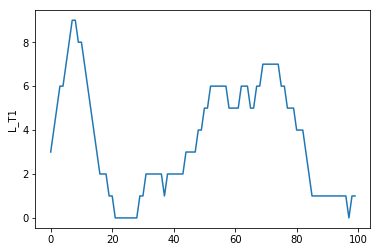

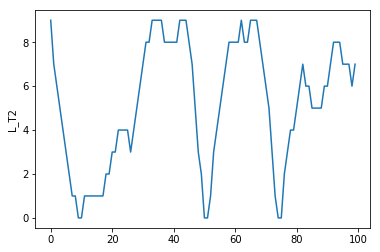

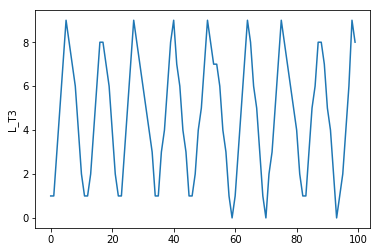

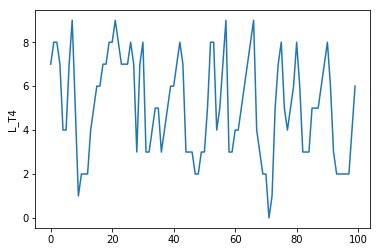

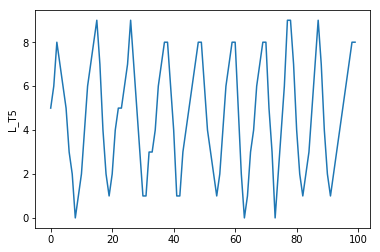

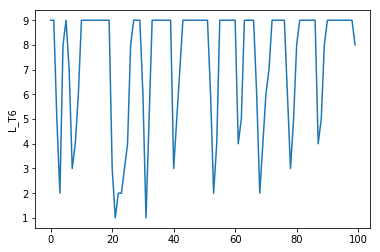

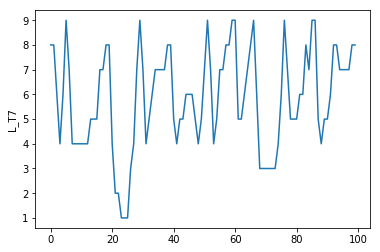

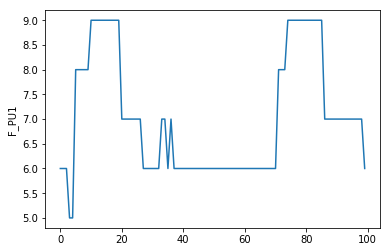

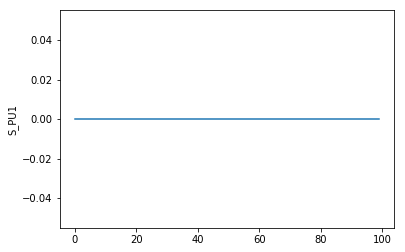

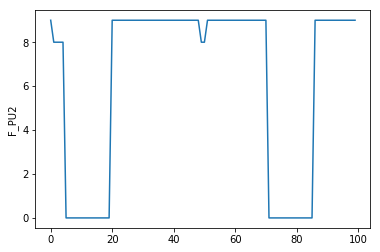

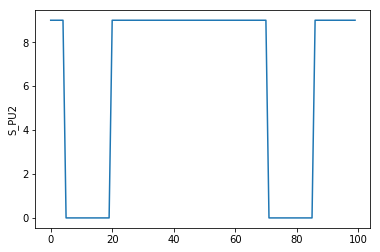

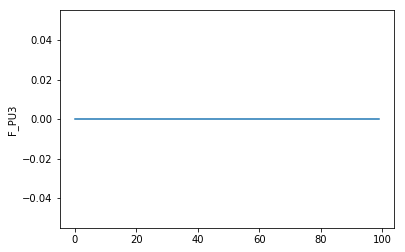

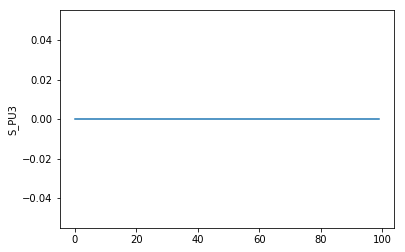

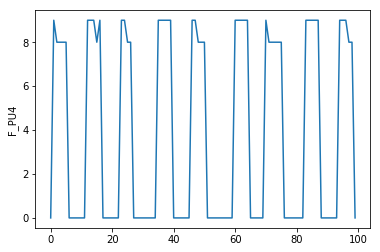

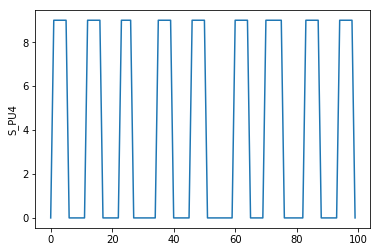

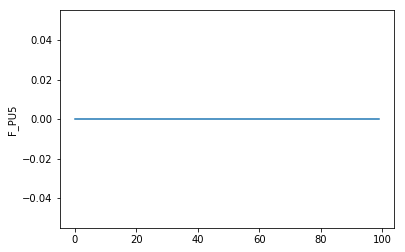

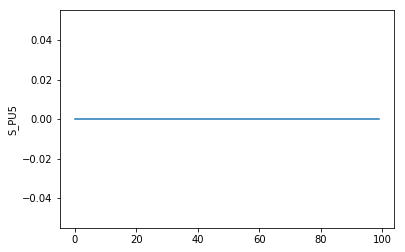

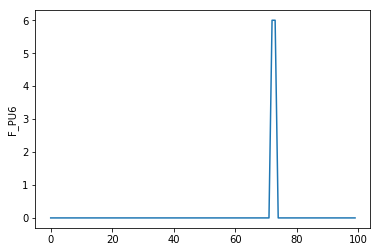

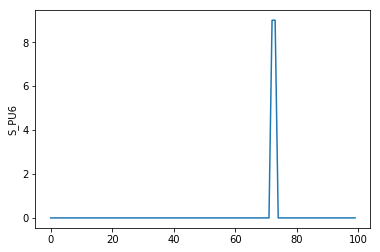

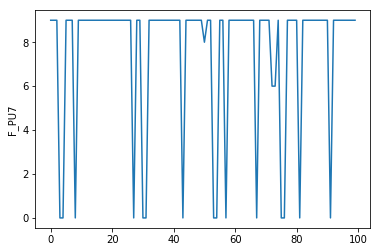

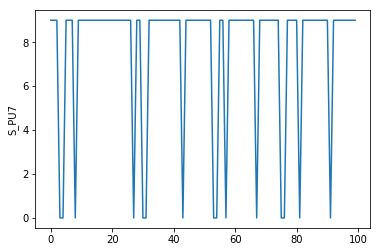

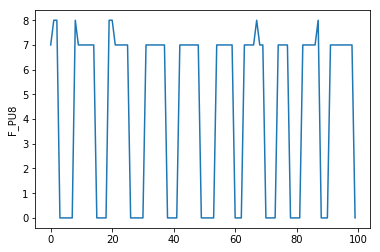

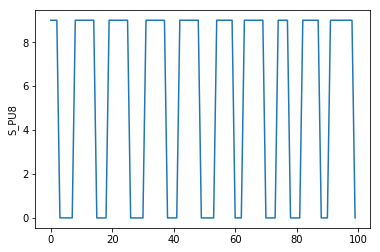

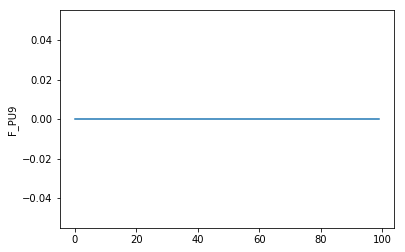

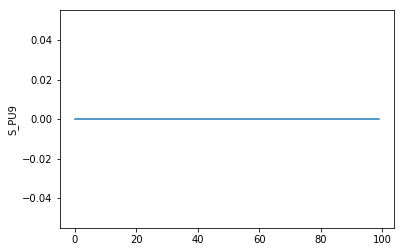

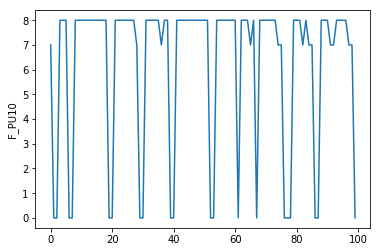

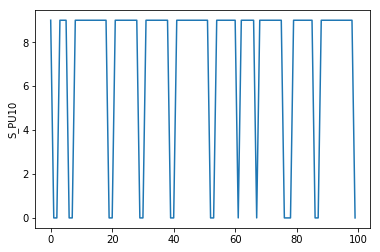

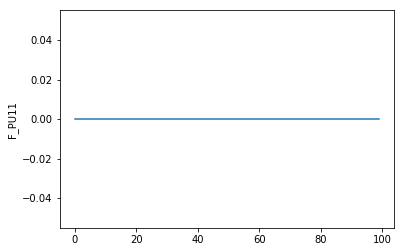

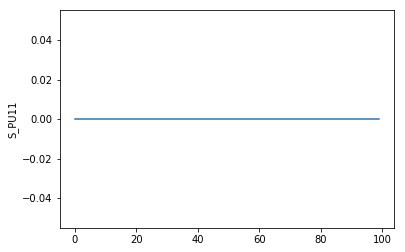

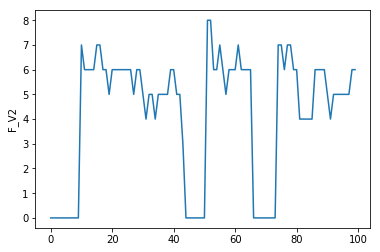

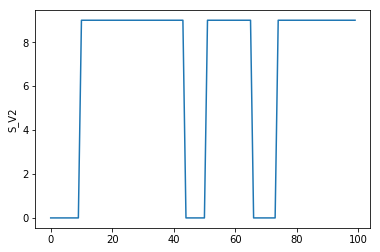

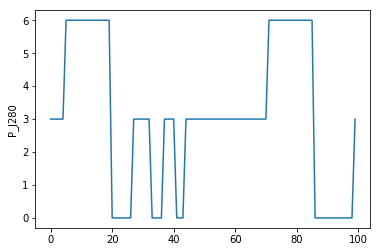

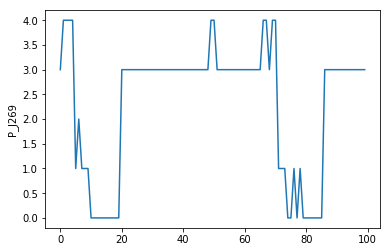

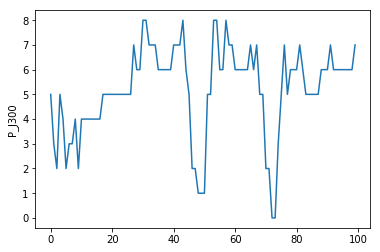

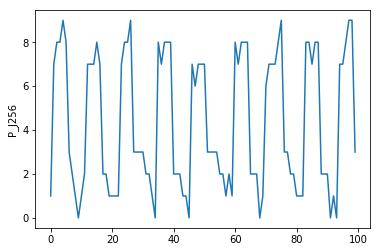

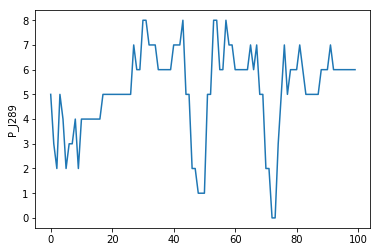

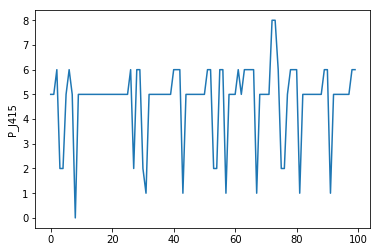

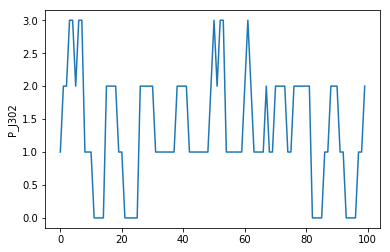

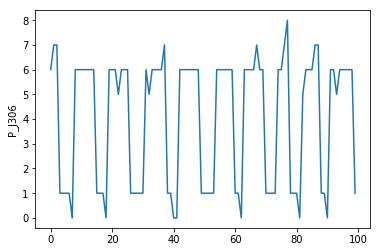

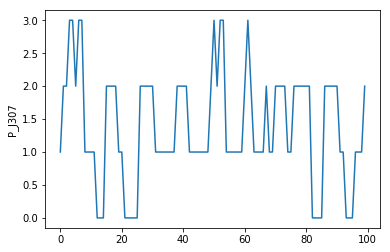

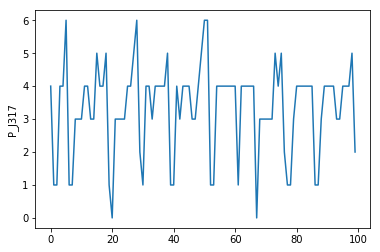

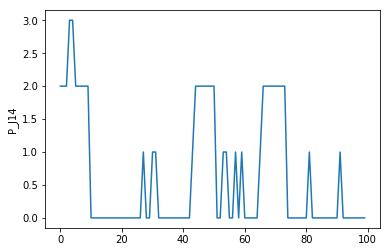

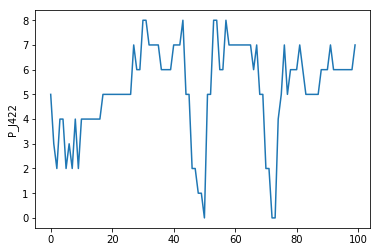

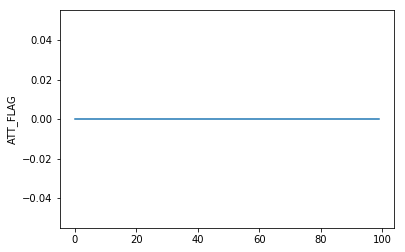

In [6]:
for column in df2:
    plt.plot(df2[column][:100],'-')
    plt.ylabel(column)
    plt.show()

In [7]:
class MarkovChain:

    def __init__(self):
        self.transitions = None
        self.trans_matrix = {}
        self.states_prob = {}

    def _learn_key(self, key, value):
        if key not in self.memory:
            self.memory[key] = []
        self.memory[key].append(value)

    def _learn_trans_matrix(self,states):
        self.trans_matrix = {}
        for key in self.transitions:
            occurrences = []
            # Count occurrences (with Laplace smoothing)
            for s in states:
                occurrences.append(self.transitions[key].count(s)+1)
                
            # Gen probabilities
            total = float(sum(occurrences))
            row = {}
            for s,o in zip(states,occurrences):
                row[s] = o/total
            self.trans_matrix[key] = row
        
    def _get_bigrams(self,sequence):
        return [(sequence[i], sequence[i + 1]) for i in range(0, len(sequence) - 1)]
    

    def learn(self, sequence, states):
        # Generate prob for each single state
        count = dict([(s,1) for s in states]) # Initialize counter at 1 (Laplace Smoothing)
        for s in sequence: count[s] += 1.
        for s in count: 
            self.states_prob[s] = count[s]/(len(sequence) + len(states))
        
        
        # Count transictions
        bigrams = self._get_bigrams(sequence)
        self.transitions = dict((s,[]) for s in states)
        
        for bigram in bigrams:
            self.transitions[bigram[0]].append(bigram[1])
        
        # Generate transiction matrix
        self._learn_trans_matrix(states)
        
    def get_prob(self, sequence):
        bigrams = self._get_bigrams(sequence)
        p = self.states_prob[sequence[0]]
        for s1,s2 in bigrams:
            p *= self.trans_matrix[s1][s2]
        return p
    
    def predict(self,sequence):
        prediction = (0,0) # (state, probability)
        for s in self.states_prob:
            p = self.get_prob(sequence+[s])
            if p > prediction[1]:
                prediction = (s,p)
        return prediction


In [24]:
def calculate_probs(model,sequence,win_size,plot=False):
    
    # Estimate probability of each sub sequence
    grams = [ sequence[i:i+win_size] for i in range(len(sequence)-win_size+1)]
    probs = [model.get_prob(g) for g in grams]
    
    if plot:
        plt.plot(probs,'-')
        #plt.axis([0,len(probs),0,0.000001])
        plt.show()

        # Plot prediction against real values
        predictions = [m.predict(g)[0] for g in grams]
    
        len_plot = 300
        plt.plot(sequence[win_size-1:len_plot+win_size],'-')
        plt.plot(predictions[:len_plot],'-')
        plt.show()
    
    return probs


WINDOW_SIZE = 10    

# We create a Markov Model for each column of the dataset
models = {}
for c in df:
    sequence = list(df[c])
    
    m = MarkovChain()
    m.learn(sequence,[float(i) for i in range(10)])
    probs = calculate_probs(m,sequence,WINDOW_SIZE)
    
    models[c] = {'MC':m, 'min_prob': min(probs)}
    


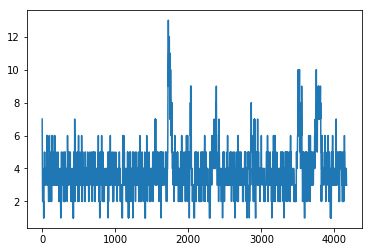

1722 9
1723 10
1724 9
1725 9
1726 10
1727 13
1728 10
1729 10
1730 11
1731 11
1732 11
1733 12
1734 11
1735 11
1736 10
1737 10
1738 11
1739 12
1740 12
1741 11
1742 11
1743 10
1744 9
1745 10
1746 10
1747 10
1749 11
1750 11
1751 10
1752 9
1753 9
1754 8
1757 10
1758 10
1759 9
1760 8
1763 8
1766 8
1767 8
1775 8
1776 8
2029 8
2032 9
2033 9
2036 8
2037 9
2378 8
2380 8
2381 8
2382 8
2383 9
2384 9
2862 8
3500 8
3501 9
3502 10
3503 10
3504 10
3505 10
3510 8
3512 8
3517 8
3519 8
3520 9
3521 10
3522 10
3525 8
3552 9
3553 8
3749 9
3750 10
3751 10
3752 10
3753 10
3754 9
3755 8
3757 8
3758 8
3767 8
3768 8
3769 8
3770 8
3771 8
3772 8
3773 8
3774 8
3775 8
3777 8
3778 8
3779 9
3780 9
3781 9
3783 8
3784 8
3785 8
3786 8
3787 8
3788 9
3789 8
3790 8
3791 8
3793 8
3794 8
3797 8
3798 8
3799 8
3800 8
3801 8
3802 8
3803 8
3804 8
3805 8
3806 8
3807 8
3808 9
3809 9
3811 8


In [29]:

anomalies = {}
for c in df2:
    
    # Calculate the probabilities of each transition  
    sequence = list(df2[c])
    probs = calculate_probs(models[c]['MC'],sequence,WINDOW_SIZE)
    
    # Collect anomaly points as those where the prob is less than a threshold
    raw_anomaly_points = []
    for i in range(len(probs)):
        if probs[i] < models[c]['min_prob']:
            raw_anomaly_points.append(i)
    
    
    anomaly_points = []
    if len(raw_anomaly_points) > 0 :  
        anomaly_points.append(raw_anomaly_points[0])
        for i in range(1,len(raw_anomaly_points)):
            if raw_anomaly_points[i] == anomaly_points[-1] + 1: continue
            anomaly_points.append(raw_anomaly_points[i])
            
        anomaly_points = [i+11 for i in anomaly_points]
        #print c, anomaly_points
        
        
    anomalies[c] = raw_anomaly_points
    

combined_anomalies = []
for i in range(len(df2)-WINDOW_SIZE):
    cnt = 0
    for k in anomalies:
        if i in anomalies[k]: cnt += 1
    combined_anomalies.append(cnt)
plt.plot(combined_anomalies,'-')
plt.show()

for i in range(len(combined_anomalies)):
    if combined_anomalies[i] > 7:
        print i,combined_anomalies[i]

